## 1. Requeriments

In [5]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [6]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from torch_geometric.loader import DataLoader
import os

## 3. Graph building

### 3.1. Gene matrix

In [7]:
os.chdir("../../../Sunitinib_Avelumab+Axitinib")

In [8]:
genes = pd.read_csv('Data/Preprocessed_data/Gene_Matrix/biogrid_included_genes_ave_axi_6m.csv')
Y = genes.Y

genes = genes.iloc[:,1:18432]
genes

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,2.91,4.71,10.78,0.01,0.01,7.18,0.01,6.22,4.38,0.01,...,3.18,3.96,3.82,3.83,2.86,0.01,4.12,8.23,5.45,5.26
1,2.26,1.53,9.77,0.01,1.25,6.16,0.01,6.61,5.14,0.01,...,3.31,2.95,4.11,3.80,3.06,1.49,4.20,8.26,5.83,5.36
2,2.41,0.01,10.49,0.01,0.28,6.90,0.01,6.51,4.44,0.01,...,3.04,3.78,4.33,4.00,3.59,0.41,4.00,8.44,5.99,5.39
3,1.13,2.09,9.45,0.01,0.01,6.77,0.01,6.27,4.31,0.01,...,1.95,2.25,3.91,3.94,3.85,1.67,4.04,8.38,5.22,5.08
4,0.91,3.77,8.11,0.01,0.01,6.47,0.01,5.90,4.11,0.01,...,2.63,2.21,4.30,4.01,3.20,0.16,4.47,7.99,4.89,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.29,3.32,9.15,0.01,0.29,7.16,0.01,6.24,4.81,0.01,...,1.61,2.54,3.43,3.25,2.97,2.54,3.67,8.25,4.96,4.50
350,2.76,2.78,9.95,0.01,4.02,7.07,0.01,6.14,3.32,0.01,...,2.89,3.24,4.16,3.78,3.09,2.29,4.00,8.97,5.77,5.62
351,1.13,4.48,8.37,0.01,0.01,6.72,0.01,6.21,5.04,0.01,...,3.42,3.35,3.15,2.86,2.60,0.01,3.61,9.07,4.97,6.57
352,1.74,1.20,8.96,0.01,0.01,5.98,0.01,6.16,5.75,0.01,...,3.01,3.77,4.44,4.30,2.92,0.21,4.34,7.93,5.10,5.02


In [9]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0.273585,0.709970,0.810757,0.0,0.000000,0.696043,0.0,0.517857,0.519789,0.0,...,0.518041,0.666,0.321337,0.631405,0.301587,0.000000,0.615658,0.464935,0.530120,0.578554
1,0.212264,0.229607,0.609562,0.0,0.220641,0.512590,0.0,0.691964,0.720317,0.0,...,0.551546,0.464,0.395887,0.626446,0.365079,0.227343,0.644128,0.472727,0.682731,0.603491
2,0.226415,0.000000,0.752988,0.0,0.048043,0.645683,0.0,0.647321,0.535620,0.0,...,0.481959,0.630,0.452442,0.659504,0.533333,0.061444,0.572954,0.519481,0.746988,0.610973
3,0.105660,0.314199,0.545817,0.0,0.000000,0.622302,0.0,0.540179,0.501319,0.0,...,0.201031,0.324,0.344473,0.649587,0.615873,0.254992,0.587189,0.503896,0.437751,0.533666
4,0.084906,0.567976,0.278884,0.0,0.000000,0.568345,0.0,0.375000,0.448549,0.0,...,0.376289,0.316,0.444730,0.661157,0.409524,0.023041,0.740214,0.402597,0.305221,0.640898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.120755,0.500000,0.486056,0.0,0.049822,0.692446,0.0,0.526786,0.633245,0.0,...,0.113402,0.382,0.221080,0.535537,0.336508,0.388633,0.455516,0.470130,0.333333,0.389027
350,0.259434,0.418429,0.645418,0.0,0.713523,0.676259,0.0,0.482143,0.240106,0.0,...,0.443299,0.522,0.408740,0.623140,0.374603,0.350230,0.572954,0.657143,0.658635,0.668329
351,0.105660,0.675227,0.330677,0.0,0.000000,0.613309,0.0,0.513393,0.693931,0.0,...,0.579897,0.544,0.149100,0.471074,0.219048,0.000000,0.434164,0.683117,0.337349,0.905237
352,0.163208,0.179758,0.448207,0.0,0.000000,0.480216,0.0,0.491071,0.881266,0.0,...,0.474227,0.628,0.480720,0.709091,0.320635,0.030722,0.693950,0.387013,0.389558,0.518703


In [10]:
train_genes, test_genes, Y_train, Y_test = train_test_split(genes, Y, test_size=0.1, stratify=Y)

### 3.2. Graph edges

In [11]:
path ='Graph_networks/Biogrid/Data/biogrid_minimum.edgelist'
G_initial = nx.read_edgelist(path)
print(G_initial)
G = G_initial.subgraph(genes.columns)
nx.write_edgelist(G, "Data/conected_graph.edgelist")
data = pd.read_csv("Data/conected_graph.edgelist", delimiter=' ')
edge_index1=data[data.columns[0]].to_numpy()
edge_index2=data[data.columns[1]].to_numpy()

Graph with 18431 nodes and 17767 edges


In [12]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [13]:
edge_index

array(['GRB7', 'GRB7', 'A1BG', ..., 'ZSCAN23', 'ZSCAN30', 'ZNF221'],
      dtype=object)

In [14]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

18431

In [15]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [16]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [17]:
edge_index

array([[ 6429,  6429,     0, ..., 18406, 18406, 17945],
       [  372, 13479,    58, ..., 18400, 18404, 17942]])

In [18]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[ 6429,  6429,     0,  ..., 18406, 18406, 17945],
        [  372, 13479,    58,  ..., 18400, 18404, 17942]])

### 3.3. Create dataset

In [19]:
train_data=[]
for g in range(len(train_genes)):
  b=[]
  for i in train_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_train.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  train_data.append(data)

print(len(train_data))

318


In [20]:
test_data=[]
for g in range(len(test_genes)):
  b=[]
  for i in test_genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    # a.append(i*100)
    a.append(i)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float).reshape([-1,1])
  edge_index = edge_index
  y = torch.tensor([Y_test.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  test_data.append(data)

print(len(test_data))

36


In [21]:
# def plot_graph(data,description=True):
#     edges_raw = data.edge_index.numpy()
#     edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
#     labels = data.x.numpy()
#     G = nx.Graph()
#     G.add_nodes_from(list(range(np.max(edges_raw))))
#     G.add_edges_from(edges)
#     plt.subplot(111)
#     options = {
#        'node_size': 100,
#        'width': 1,
#     }
#     nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
#     plt.show()

# plot_graph(data,True)

### 3.4. Patient sample

In [22]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Number of node features: {data.num_node_features}')


Number of nodes: 18431
Number of charcateristics per node: 1
Number of edges: 17766
Average node degree: 0.96
Has isolated nodes: False
Has self-loops: False
Is undirected: False
Number of node features: 1


## 4. Graph training

### 4.2. Training and testing the model

In [23]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [24]:
# import torch
# import torch.nn.functional as F
# from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
# from torch_geometric.nn import GCNConv, GINConv
# from torch_geometric.nn import global_mean_pool, global_add_pool
# embed_dim = 32

# class Net(torch.nn.Module):
#     def __init__(self, dim_h):
#         super(Net, self).__init__()
#         self.conv1 = GCNConv(1, dim_h)
#         self.conv2 = GCNConv(dim_h, dim_h)
#         self.conv3 = GCNConv(dim_h, dim_h)
#         self.lin = Linear(dim_h, 1)

#     def forward(self, x, edge_index, batch):
#         # Node embeddings 
#         h = self.conv1(x, edge_index)
#         h = h.relu()
#         h = self.conv2(h, edge_index)
#         h = h.relu()
#         h = self.conv3(h, edge_index)

#         # Graph-level readout
#         hG = global_mean_pool(h, batch)

#         # Classifier
#         h = F.dropout(hG, p=0.5, training=self.training)
#         h = self.lin(h)
        
#         return F.sigmoid(h).squeeze(1)


In [25]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(1, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, 2)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return F.log_softmax(h, dim=1)

In [26]:
from sklearn.metrics import f1_score

def train(model, train_loader, optimizer, criterion):
    total_loss = 0
    total_accuracy = 0
    total_f1score = 0
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        # print((output.argmax(dim=1)))
        loss = criterion((output.argmax(dim=1)).to(torch.float), data.y.squeeze(1))/len(train_loader)
        total_loss += loss 
        total_accuracy += accuracy(output.argmax(dim=1), data.y.squeeze(1))
        total_f1score += f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')
        # loss.backward()
        optimizer.step()

    total_loss = total_loss/len(train_loader)
    total_accuracy = total_accuracy / len(train_loader)
    total_f1score = total_f1score / len(train_loader)
    return total_loss, total_accuracy, total_f1score

    
@torch.no_grad()
def validation(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    total_accuracy = 0
    total_f1score = 0
    for data in val_loader:
        output = model(data.x, data.edge_index, data.batch)
        total_loss += criterion((output.argmax(dim=1)).to(torch.float), data.y.squeeze(1))/len(val_loader)
        total_accuracy += accuracy(output.argmax(dim=1), data.y.squeeze(1)) / len(val_loader)
        total_f1score += f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')

    total_loss = total_loss/len(val_loader)
    total_accuracy = total_accuracy / len(val_loader)
    total_f1score = total_f1score / len(val_loader)
    return total_loss, total_accuracy, total_f1score

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

def test(model, test_loader):
    total_accuracy = 0
    total_f1score = 0
    for data in test_loader:
        output = model(data.x, data.edge_index, data.batch)
        total_accuracy += accuracy(output.argmax(dim=1), data.y.squeeze(1))
        total_f1score += f1_score(data.y.squeeze(1), output.argmax(dim=1), average='weighted')

    total_accuracy = total_accuracy / len(test_loader)
    total_f1score = total_f1score / len(test_loader)
    return total_accuracy, total_f1score

In [27]:
from sklearn.model_selection import StratifiedKFold # import KFold
kf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [28]:
import json
for train_index, val_index in kf.split(train_data, Y_train):
    train_dataset=[]
    val_dataset=[]
    print('TRAIN: ', train_index, '\nTEST:', val_index)
    for i in train_index:
        train_dataset.append(train_data[i])
    for i in val_index:
        val_dataset.append(train_data[i])
    print('Patients in train set: '+str(len(train_dataset)))
    print('Patients in val set: '+str(len(val_dataset)))

    model = GIN(dim_h=8)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
    # optimizer = torch.optim.Adadelta(model.parameters(), lr=0.7)

    epochs = 5
    batch_size = 16
    criterion = nn.BCELoss()

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    for epoch in range(epochs+1):
        train_loss, train_acc, train_f1score = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_f1score = validation(model, val_loader, criterion)
        
        val_loss=val_loss.detach().numpy()
        train_loss=train_loss.detach().numpy()
        print(float(train_loss))

        data = {'Epoch': epoch, 'Train loss': float(train_loss), 'Train Acc': train_acc, 'Train f1-score': train_f1score, 'Val loss': float(val_loss), 'Val Acc': val_acc, 'Val f1-score': val_f1score}
        json_string = json.dumps(data)
        with open('Graph_networks/GNN/train_results.json', 'a') as outfile:
            outfile.write(json_string+'\n')
       
        print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Train f1-score: {train_f1score:.4f}, Val loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val f1-score: {val_f1score:.4f},')

    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
    test_acc, test_f1score = test(model, test_loader)
    data = {'Test Acc': test_acc, 'Test f1-score': test_f1score}
    json_string = json.dumps(data)
    with open ("Graph_networks/GNN/test_results.json", "a") as result_test_file:
        result_test_file.write(json_string+'\n')
    print(f'Test Acc: {test_acc:.4f}, Test f1-score: {test_f1score:.4f}')

TRAIN:  [ 58  60  61  62  63  64  65  67  69  70  73  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 30

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


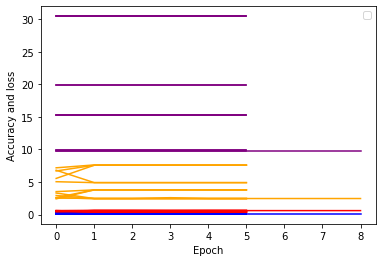

In [29]:
train_loss=[]
train_accuracy=[]
train_f1=[]
val_loss=[]
val_accuracy=[]
val_f1=[]

with open("Graph_networks/GNN/train_results.json", "r") as result_file:
        lines = result_file.readlines()
        for line in lines:
            data = json.loads(line)
            train_loss.append(data["Train loss"])
            train_accuracy.append(data["Train Acc"])
            train_f1.append(data["Train f1-score"])
            val_loss.append(data["Val loss"])
            val_accuracy.append(data["Val Acc"])
            val_f1.append(data["Val f1-score"])
            if data['Epoch']==5:
                plt.plot(train_accuracy, color="red")#, label="train accuracy")
                plt.plot(val_accuracy, color="blue")#, label="val accuracy")
                plt.plot(train_loss, color="orange")#, label="train loss")
                plt.plot(val_loss, color="purple")#, label="val loss")
                plt.xlabel("Epoch")
                plt.ylabel("Accuracy and loss")
                plt.legend()
                train_loss=[]
                train_accuracy=[]
                train_f1=[]
                val_loss=[]
                val_accuracy=[]
                val_f1=[]
                

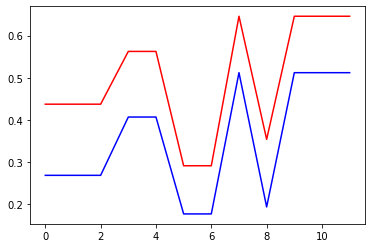

In [30]:
test_accuracy=[]
test_f1=[]
with open("Graph_networks/GNN/test_results.json", "r") as result_file:
        lines = result_file.readlines()
        for line in lines:
            data = json.loads(line)
            test_accuracy.append(data["Test Acc"])
            test_f1.append(data["Test f1-score"])
        plt.plot(test_accuracy, color="red", label="test accuracy")
        plt.plot(test_f1, color="blue", label="test f1-score")
        test_accuracy=[]
        test_f1=[]


In [31]:
# plt.plot(train_epoch, color="red", label="train accuracy")
# plt.plot(val_epoch, color="blue", label="val accuracy")
# plt.plot(train_loss_, color="orange", label="train loss")
# plt.plot(val_loss_, color="purple", label="val loss")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy and loss")
# plt.legend()